# Week 13 Task 1

In [1]:
# import libraries required
import numpy as np
#import sys
import pandas as pd
import matplotlib.pyplot as plt

#### TRAINING --------------------------------------------------------------------------------------------------------

In [2]:
# loading the file "abalone.data.txt" into variable "X" using
# numpy load text module. Only columns 2nd and 4th is stored 
# in variable "X" which represents diameter and mass of abalone.
filename = "abalone.data.txt"
X = np.loadtxt( filename, delimiter=',', usecols=(2,4) )

In [3]:
# 1st column in "X" , 0th column index with all rows is sliced and 
# stored as single array in "diameter" and 2nd column in "X", 
# 1st column index with all rows is stored in "mass_observed"
diameter = X[:,0]
mass_observed = X[:,1]

In [4]:
# With the seed reset (every time), the same set of numbers will appear every time.
np.random.seed(10)
print('Total dataset has ',diameter.size,' data points')
sample_size = 10
print('Will use a random sample of only ',sample_size,' data points')
# Generating a uniform random sample from np.arange(4177) of size 10
sample_indices = np.random.choice(diameter.size,sample_size)
# "sample_indices" has array of 10 values which will be used
# as indices to choose from actual diameter and mass_observed arrays
diameter_sample = diameter[sample_indices]
mass_observed_sample = mass_observed[sample_indices]

Total dataset has  4177  data points
Will use a random sample of only  10  data points


In [5]:
# np.random.choice also takes in directly an array 
# "np.random.choice(diameter,sample_size)",
# but every time we run the cell new 10 numbers will be selected 
# in random. Thus, we are going with choosing indices.

In [6]:
print("diameter-size:", diameter_sample.size,"rows in column 0")
print("diameter-size:", mass_observed_sample.size,"rows in column 0")

diameter-size: 10 rows in column 0
diameter-size: 10 rows in column 0


In [7]:
# degree of polynomial 1 produces linear model, y=mx+b
degree_of_polynomial_to_fit = 1
# syntax: np.polyfit(x,y,degree), where x is x-coordinates 
# of sample and y is y-coordinate of sample points and degree
# is the degree of the polynomial of model produces coefficients.
# co-efficients here are weight and bias.
coefficients = np.polyfit(diameter_sample, mass_observed_sample, degree_of_polynomial_to_fit)

In [8]:
coefficients
# o/p: (weight, bias)

array([ 5.41145369, -1.368485  ])

#### TESTING --------------------------------------------------------------------------------------------------------

In [9]:
# np.linspace() returns numbers evenly spaced samples, calculated over the interval [start, stop].
# 100 such evenly spaced diameters between the max and min will be used for testing
diameter_sample_for_plot = np.linspace(diameter_sample.min(),diameter_sample.max(),100)

In [10]:
# Using the fitted model coefficients to create the model function.
model_for_mass = np.poly1d(coefficients)
model_for_mass

poly1d([ 5.41145369, -1.368485  ])

In [11]:
# mass variable is predicted using model function for each
# diameter sample points
mass_prediction_for_plot = model_for_mass(diameter_sample_for_plot)
mass_prediction_for_plot.shape

(100,)

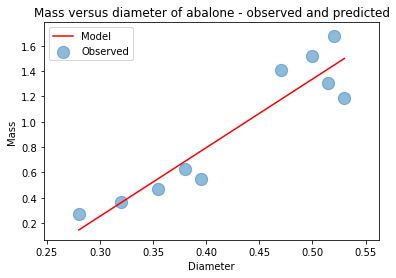

fitted model is 1st order
y=  
5.411 x - 1.368


In [26]:
# with 100 points of diameter and mass computed, which is the model points. Plot comparing
# the ten actual points with the predicted is compared to see how the actual points
# aligh with our model 100 points.
plt.scatter(diameter_sample,mass_observed_sample, marker = 'o', s=150, alpha = 0.5,label='Observed')
plt.plot(diameter_sample_for_plot,mass_prediction_for_plot,color='red',label='Model')
plt.xlabel('Diameter')
plt.ylabel('Mass')
plt.title('Mass versus diameter of abalone - observed and predicted')
plt.legend(loc='best')
plt.show()
degree_polynomial(degree_of_polynomial_to_fit)

In [43]:
def degree_polynomial_order(i):
    degree_of_polynomial_to_fit = i
    coefficients = np.polyfit(diameter_sample, mass_observed_sample, degree_of_polynomial_to_fit)
    diameter_sample_for_plot = np.linspace(diameter_sample.min(),diameter_sample.max(),100)
    model_for_mass = np.poly1d(coefficients)
    mass_prediction_for_plot = model_for_mass(diameter_sample_for_plot)
    print("==============================================================")
    if i == 1:
        print("y= {}".format(model_for_mass))
        print("fitted model is {}st order".format(degree_of_polynomial_to_fit))
    if i == 2:
        print("y= {}".format(model_for_mass))
        print("fitted model is {}nd order".format(degree_of_polynomial_to_fit))
    if i == 3:
        print("y= {}".format(model_for_mass))
        print("fitted model is {}rd order".format(degree_of_polynomial_to_fit))
    if i > 3 :
        print("y={}".format(model_for_mass))
        print("fitted model is {}th order".format(degree_of_polynomial_to_fit))    
    plt.scatter(diameter_sample,mass_observed_sample, marker = 'o', s=150, alpha = 0.5,label='Observed')
    plt.plot(diameter_sample_for_plot,mass_prediction_for_plot,color='red',label='Model')
    plt.xlabel('Diameter')
    plt.ylabel('Mass')
    plt.title('Mass versus diameter of abalone - observed and predicted')
    plt.legend(loc='best')
    plt.show()


y=  
5.411 x - 1.368
fitted model is 1st order


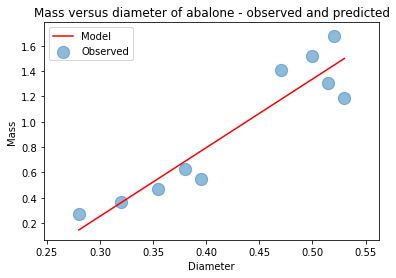

y=        2
4.535 x + 1.648 x - 0.6226
fitted model is 2nd order


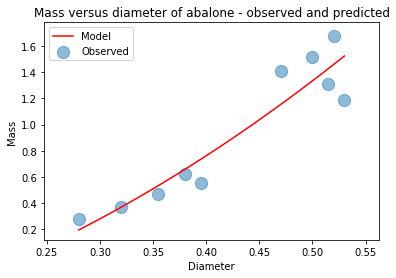

y=         3         2
-344.5 x + 419.2 x - 160.5 x + 19.98
fitted model is 3rd order


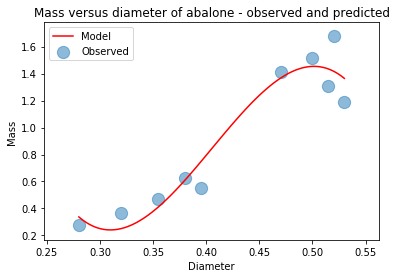

y=       4        3        2
-3637 x + 5588 x - 3151 x + 777.3 x - 70.68
fitted model is 4th order


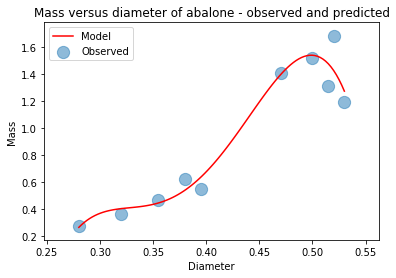

y=            5             4             3        2
-1.715e+04 x + 3.103e+04 x - 2.208e+04 x + 7748 x - 1340 x + 91.67
fitted model is 5th order


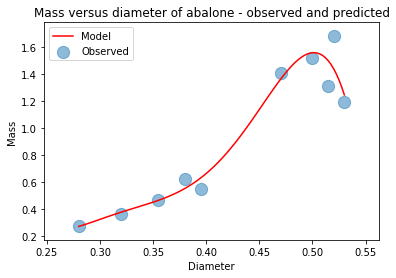

y=           6            5             4             3             2
1.557e+05 x - 4.02e+05 x + 4.234e+05 x - 2.333e+05 x + 7.103e+04 x - 1.134e+04 x + 743.2
fitted model is 6th order


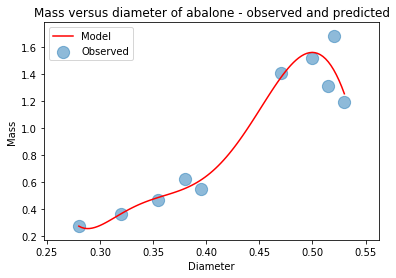

y=            7            6             5             4             3
-1.103e+07 x + 3.18e+07 x - 3.901e+07 x + 2.638e+07 x - 1.062e+07 x
              2
 + 2.543e+06 x - 3.354e+05 x + 1.879e+04
fitted model is 7th order


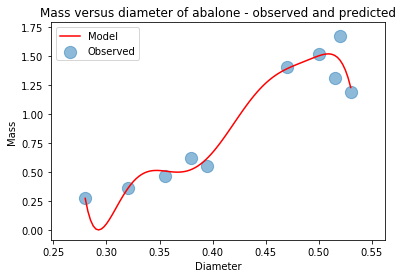

y=            8             7             6             5             4
-4.776e+08 x + 1.587e+09 x - 2.293e+09 x + 1.881e+09 x - 9.577e+08 x
            3             2
 + 3.1e+08 x - 6.228e+07 x + 7.098e+06 x - 3.514e+05
fitted model is 8th order


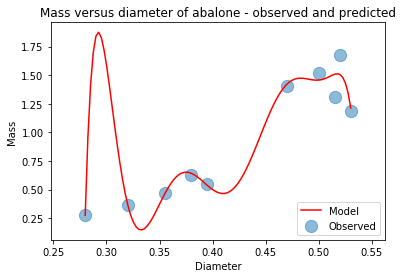

y=           9             8             7             6             5
-6.24e+10 x + 2.335e+11 x - 3.862e+11 x + 3.707e+11 x - 2.274e+11 x
             4             3             2
 + 9.25e+10 x - 2.494e+10 x + 4.296e+09 x - 4.293e+08 x + 1.895e+07
fitted model is 9th order


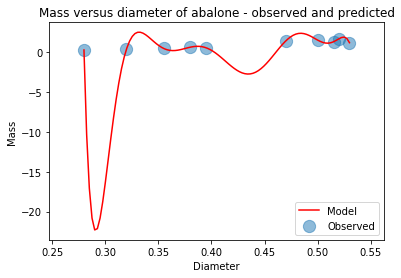

/home/bhavya/anaconda3/envs/venv/lib/python3.4/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


y=            10             9             8             7             6
-6.043e+10 x  + 1.954e+11 x - 2.589e+11 x + 1.685e+11 x - 3.753e+10 x
             5             4             3           2
 - 2.25e+10 x + 2.142e+10 x - 8.121e+09 x + 1.7e+09 x - 1.929e+08 x + 9.322e+06
fitted model is 10th order


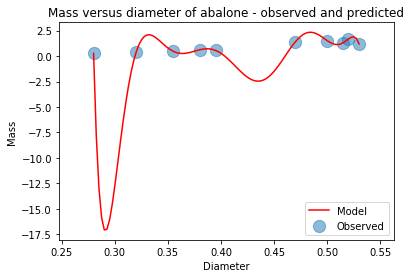

In [44]:
for i in range(1,11):
    degree_polynomial_order(i)

### model of order 1,2,3 are under fitting

### model of order 4,5,6 are good fit

### model of order 7,8,9,10 are over fitting